Pandalytics - Equipo 1
* A00832444 | Andrea Garza
* A01197991 | Hiram Maximiliano Muñoz Ramírez
* A00517124 | Erick Orlando Hernández Vallejo
* A01197655 | Raúl Isaí Murillo Alemán
* A01235692 | David Gerardo Martíne Hidrogo

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
spotify_df = pd.read_csv('data/reencoded_spotify.csv')
#verificacion de datos  columnas y renglones
spotify_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023.0,7.0,14.0,553.0,147.0,141381703,43.0,...,125.0,B,Major,80.0,89.0,83.0,31.0,0.0,8.0,4.0
1,LALA,Myke Towers,1.0,2023.0,3.0,23.0,1474.0,48.0,133716286,48.0,...,92.0,C#,Major,71.0,61.0,74.0,7.0,0.0,10.0,4.0
2,vampire,Olivia Rodrigo,1.0,2023.0,6.0,30.0,1397.0,113.0,140003974,94.0,...,138.0,F,Major,51.0,32.0,53.0,17.0,0.0,31.0,6.0
3,Cruel Summer,Taylor Swift,1.0,2019.0,8.0,23.0,7858.0,100.0,800840817,116.0,...,170.0,A,Major,55.0,58.0,72.0,11.0,0.0,11.0,15.0
4,WHERE SHE GOES,Bad Bunny,1.0,2023.0,5.0,18.0,3133.0,50.0,303236322,84.0,...,144.0,A,Minor,65.0,23.0,80.0,14.0,63.0,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1.0,2022.0,11.0,3.0,953.0,0.0,91473363,61.0,...,144.0,A,Major,60.0,24.0,39.0,57.0,0.0,8.0,3.0
949,Bigger Than The Whole Sky,Taylor Swift,1.0,2022.0,10.0,21.0,1180.0,0.0,121871870,4.0,...,166.0,F#,Major,42.0,7.0,24.0,83.0,1.0,12.0,6.0
950,A Veces (feat. Feid),"Feid, Paulo Londra",2.0,2022.0,11.0,3.0,573.0,0.0,73513683,2.0,...,92.0,C#,Major,80.0,81.0,67.0,4.0,0.0,8.0,6.0
951,En La De Ella,"Feid, Sech, Jhayco",3.0,2022.0,10.0,20.0,1320.0,0.0,133895612,29.0,...,97.0,C#,Major,82.0,67.0,77.0,8.0,0.0,12.0,5.0


In [3]:
# Cambio de datos de la cancion igual a 0 por error en la base de datos
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'], errors = 'coerce')
spotify_df['in_deezer_playlists'] = pd.to_numeric(spotify_df['in_deezer_playlists'], errors = 'coerce')
spotify_df['in_shazam_charts'] = pd.to_numeric(spotify_df['in_shazam_charts'], errors = 'coerce')

In [4]:
# Tipo de variable
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    float64
 3   released_year         952 non-null    float64
 4   released_month        952 non-null    float64
 5   released_day          952 non-null    float64
 6   in_spotify_playlists  952 non-null    float64
 7   in_spotify_charts     952 non-null    float64
 8   streams               951 non-null    float64
 9   in_apple_playlists    952 non-null    float64
 10  in_apple_charts       952 non-null    float64
 11  in_deezer_playlists   874 non-null    float64
 12  in_deezer_charts      952 non-null    float64
 13  in_shazam_charts      895 non-null    float64
 14  bpm                   952 non-null    float64
 15  key                   8

In [5]:
#media, mediana y desviacion estandar
spotify_df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.510000e+02,952.000000,952.000000,874.000000,952.000000,895.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.555672,2018.255252,6.034664,13.918067,5181.508403,12.022059,5.128950e+08,67.801471,51.914916,109.740275,2.668067,51.233520,122.489496,66.982143,51.474790,64.257353,27.078782,1.582983,18.223739,10.120798
std,0.893398,11.109576,3.568152,9.198455,7880.811033,19.582405,5.658568e+08,86.486297,50.656490,178.811406,6.038529,126.546992,28.028487,14.633148,23.454486,16.545573,26.001599,8.414064,13.714428,9.912928
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.415514e+08,13.000000,7.000000,12.000000,0.000000,0.000000,99.750000,57.000000,32.750000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.902286e+08,34.000000,38.000000,36.500000,0.000000,2.000000,120.500000,69.000000,51.500000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5503.750000,16.000000,6.732287e+08,88.000000,87.000000,110.000000,2.000000,36.000000,140.000000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,974.000000,58.000000,953.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


## Conclusion

Basándose en la **media, mediana y desviación estándar** de las variables, ¿Qué conclusiones puedes tener de los datos? 

- La columna `artist_count` nos dice la cantidad de artistas que aparecen en una canción.
  - En promedio, las canciones tienen 1 o 2 artistas. La mediana es exactamente 1, por lo que
    la mayoria de las canciones tiene 1 artista.
- La columna `released year` nos indica el año en que cierta canción salió.
  - El promedio es 2018, y la desviación estándar es 11. Esto significa que la mayoría de la musica
    popular es reciente, con la mediana estando directamente en el 2022 y significando que la mayoría de las canciónes son recientes.
  - Esto tambien nos dice que hay algunos *outliers* moviendo el año promedio hacia atrás, como la
    canción que salió en 1930.
- La columna `released_month` nos indica el mes en que cierta canción salió.
  - El promedio se encuentra en exactamente el centro del año, con Junio siendo el mes promedio.
  - La desviación estándar es de 3.5, por lo cual las canciones se encuentran distribuidas a
    lo largo de todo el año.
- La columna `released_day` indica el día del mes durante el cual salío una canción.
  - En general, las canciones salen distribuidas a lo largo del mes.
- La columna `in_spotify_playlists` indica en cuantas *playlists* está cada canción.
  - El promedio es 5181, sin embargo,  la mediana esta en 5503 y la desviación estándar es de 7880.
    Esto nos indica que hay *outliers* afectando la distribución hacia arriba, como el maximo de
    52,898.
- La columna `in_apple_playlist` nos indica el número de playlists donde se encuentra una canción
  - El promedio es 86.48, sin embargo, la mediana esta en 34 y la desviación estandar 86.
    Esto nos indica que hay *outliers* afectando la distribución hacía arriba, como el maximo de 672
- La columna `in_deezer_playlist` nos indica el número de playlists donde se encuentra una canción
  - El promedio es de 109.74, sin embargo, la mediana esta en 120 y la desviación estandar 178.
    Esto nos indica que hay *outliers* afectando la distribución hacía arriba.
- La columna `bpm` indica los *beats per minute* de una canción dada.
  - Podemos ver que tiene una minima de 65 y una maxima de 206 con una desviación estandar de 28.
    Con los quartiles teniendo en 25% un 99.75, en 50% un 120 y en 75% un 140
    sugiriendo que existen *outliers*.
- La columna  `danceability` nos indica el porcentaje de que la canción sea bailable
    - La mediana es de 66% sugiriendo que la mitad de las canciones son bailables
- La columna `streams` indica el número de reproducciones de una canción
    - Podemos ver que el promedio es mucho mayor que la mediana, indicando que hay canciones que
      afectan la distribución hacía arriba. 

In [6]:
spotify_df[[
            'released_year',
            'in_spotify_playlists',
            'in_spotify_charts',
            'streams',
            'in_apple_playlists',
            'in_apple_charts',
            'in_deezer_playlists',
            'in_deezer_charts',
            'bpm',
            'danceability_%',
            'valence_%',
            'energy_%',
            'acousticness_%',
            'instrumentalness_%',
            'liveness_%',
            'speechiness_%'
]].corr()

,released_year,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
released_year,1.000000,-0.390228,0.068826,-0.228343,-0.199042,-0.036062,-0.218476,0.095076,-0.002688,0.186351,-0.062237,0.097338,-0.125521,-0.014867,-0.006973,0.135571
in_spotify_playlists,-0.390228,1.000000,0.166253,0.788793,0.709886,0.272317,0.795114,0.145385,-0.023773,-0.104918,-0.017795,0.030961,-0.062786,-0.027764,-0.045070,-0.092364
in_spotify_charts,0.068826,0.166253,1.000000,0.247785,0.233477,0.552270,0.166182,0.600170,0.035890,0.029560,0.034456,0.082812,-0.055513,-0.010270,-0.048056,-0.081181
streams,-0.228343,0.788793,0.247785,1.000000,0.773582,0.321231,0.746022,0.229740,-0.006249,-0.103934,-0.037108,-0.028888,-0.002798,-0.044593,-0.046824,-0.114838
in_apple_playlists,-0.199042,0.709886,0.233477,0.773582,1.000000,0.414544,0.702806,0.369084,0.023548,-0.025234,0.057388,0.052504,-0.061705,-0.057197,-0.049519,-0.108192
in_apple_charts,-0.036062,0.272317,0.552270,0.321231,0.414544,1.000000,0.225441,0.383652,0.031223,-0.025313,0.047595,0.105069,-0.076913,-0.013169,-0.018830,-0.151497
in_deezer_playlists,-0.218476,0.795114,0.166182,0.746022,0.702806,0.225441,1.000000,0.303028,0.038285,-0.088572,0.001323,-0.014955,0.021987,0.006747,0.005058,-0.114739
in_deezer_charts,0.095076,0.145385,0.600170,0.229740,0.369084,0.383652,0.303028,1.000000,0.028583,0.070703,0.075811,0.095072,-0.029595,0.005344,-0.007787,-0.080311
bpm,-0.002688,-0.023773,0.035890,-0.006249,0.023548,0.031223,0.038285,0.028583,1.000000,-0.145889,0.044542,0.023577,-0.016324,-0.000855,0.000593,0.037531
danceability_%,0.186351,-0.104918,0.029560,-0.103934,-0.025234,-0.025313,-0.088572,0.070703,-0.145889,1.000000,0.407745,0.199406,-0.236987,-0.089333,-0.078229,0.185996


Text(0.5, 1.0, 'Matriz de correlación')

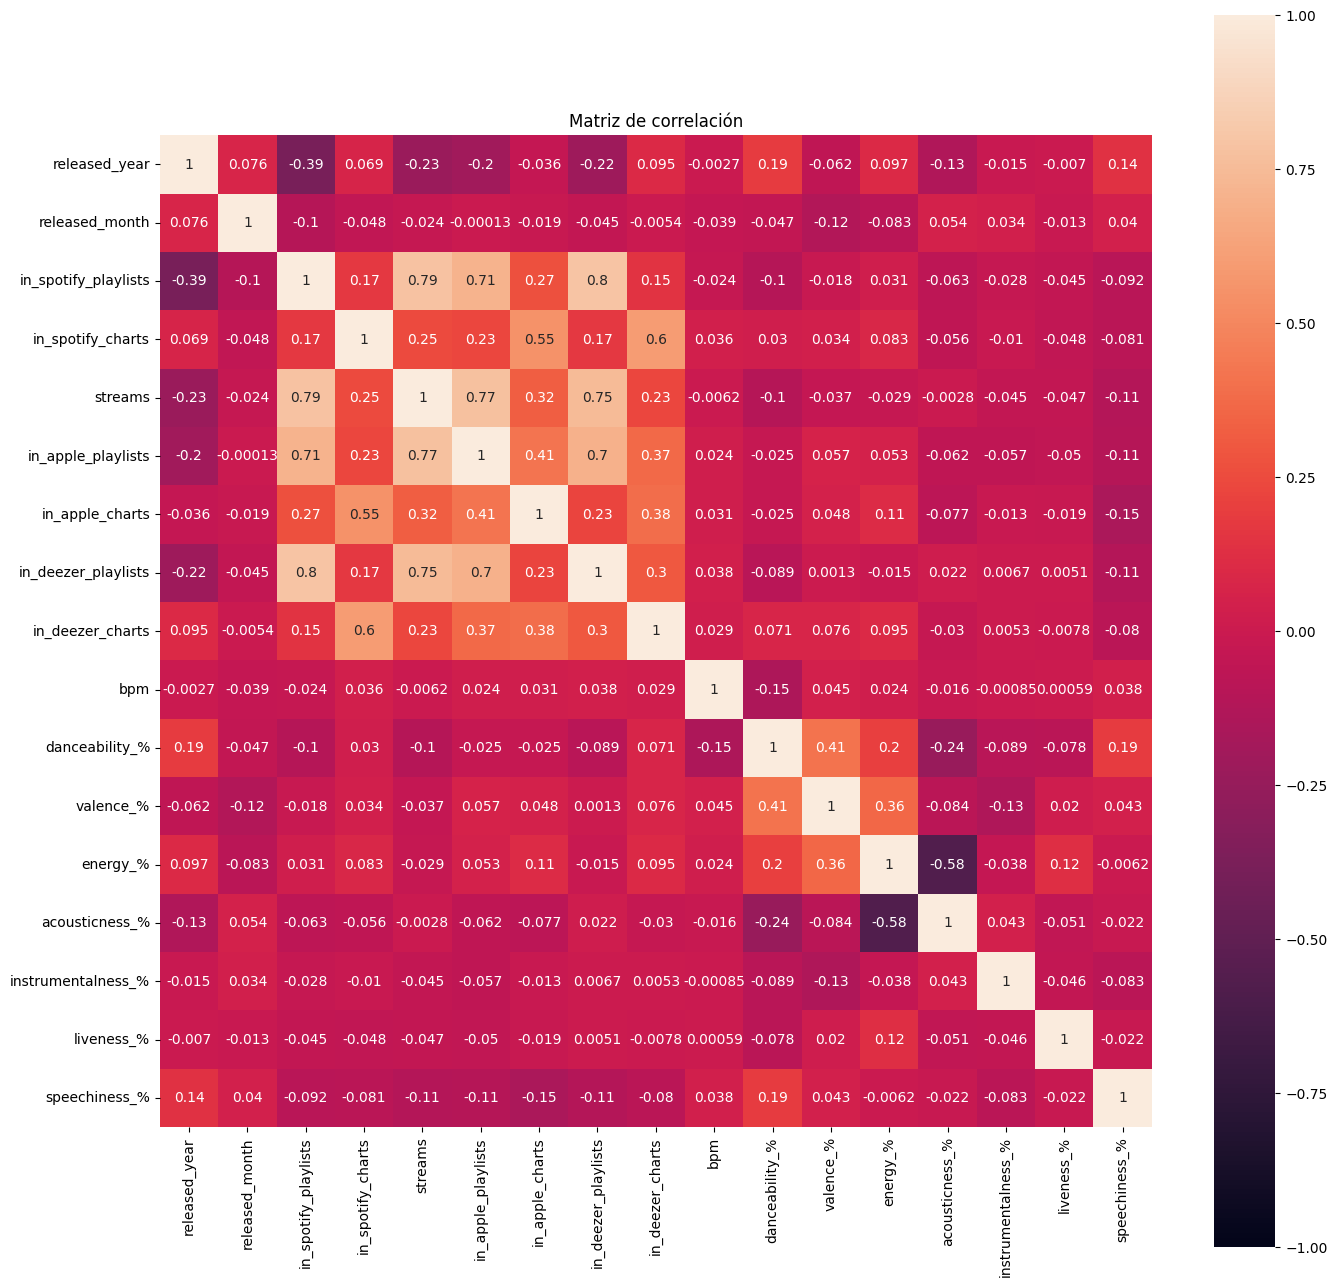

In [7]:
# 'released_year', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
plt.figure(figsize=(16,16))
sns.heatmap(spotify_df[[
            'released_year',
            'released_month',
            'in_spotify_playlists',
            'in_spotify_charts',
            'streams',
            'in_apple_playlists',
            'in_apple_charts',
            'in_deezer_playlists',
            'in_deezer_charts',
            'bpm',
            'danceability_%',
            'valence_%',
            'energy_%',
            'acousticness_%',
            'instrumentalness_%',
            'liveness_%',
            'speechiness_%'
]].corr(), annot=True, square=True, vmin=-1,vmax=1)
plt.title('Matriz de correlación')

## 'released_year'

Text(0.5, 1.0, 'released_year')

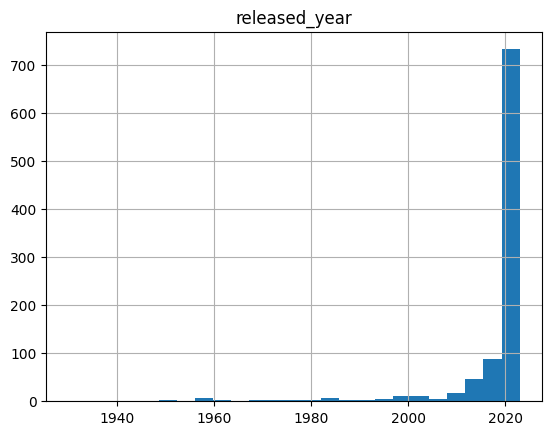

In [16]:
#Histograma
spotify_df['released_year'].hist(bins=25)
plt.title('released_year')

Text(0.5, 1.0, 'released_year')

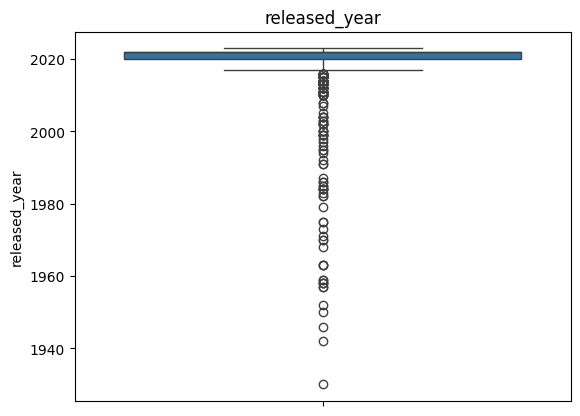

In [18]:
#Diagrama de Caja
sns.boxplot(y='released_year', data=spotify_df)
plt.title('released_year')

## 'in_spotify_playlists'

Text(0.5, 1.0, 'in_spotify_playlists')

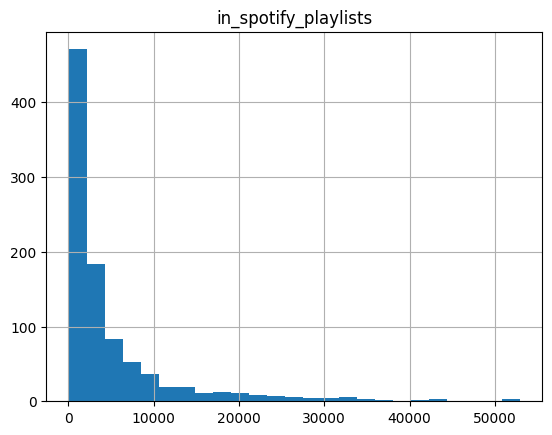

In [19]:
#Histograma
spotify_df['in_spotify_playlists'].hist(bins=25)
plt.title('in_spotify_playlists')

Text(0.5, 1.0, 'in_spotify_playlists')

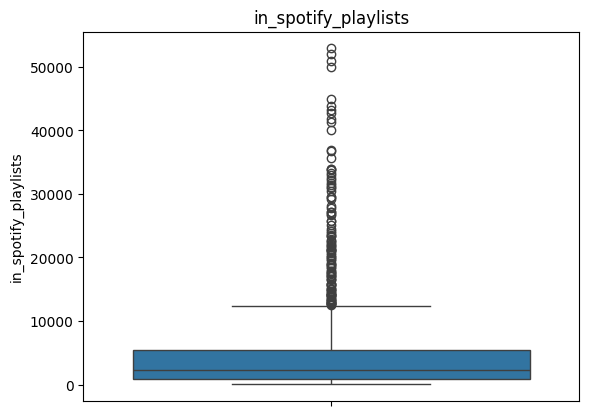

In [20]:
#Diagrama de caja
sns.boxplot(y='in_spotify_playlists', data=spotify_df)
plt.title('in_spotify_playlists')

## 'streams'

Text(0.5, 1.0, 'streams')

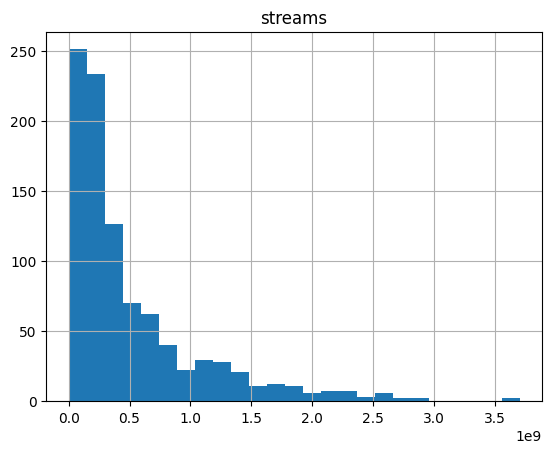

In [21]:
#Histograma
spotify_df['streams'].hist(bins=25)
plt.title('streams')

Text(0.5, 1.0, 'streams')

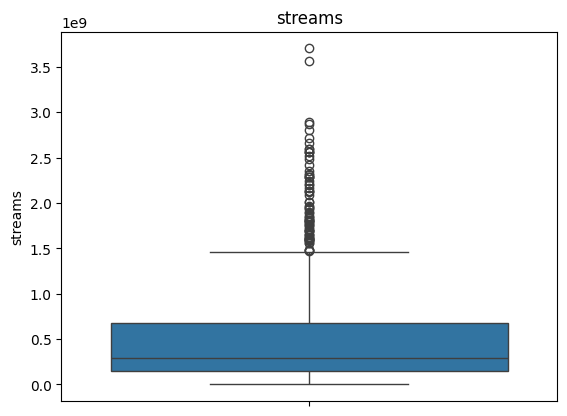

In [22]:
sns.boxplot(y='streams', data=spotify_df)
plt.title('streams')

## 'energy_%'

<Axes: >

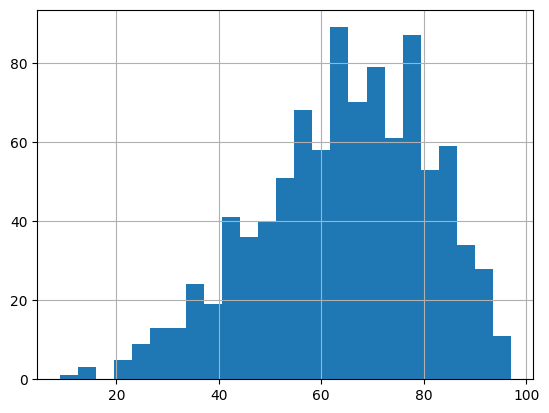

In [14]:
#Histograma
spotify_df['energy_%'].hist(bins=25)

<Axes: ylabel='energy_%'>

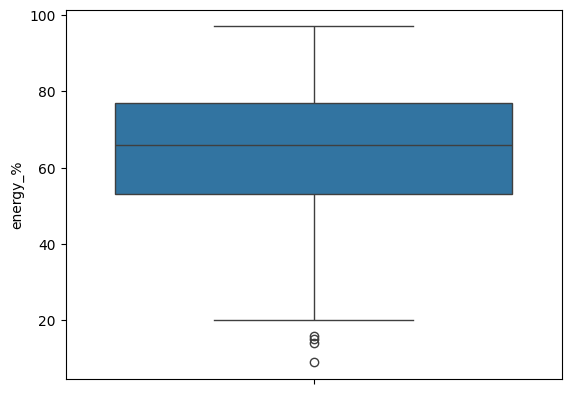

In [15]:
#Diagrama de caja
sns.boxplot(y='energy_%', data=spotify_df)

## Conclusiones

Conclusión `released_year`:
- La gran mayoria de las canciones populares son canciones relativamente modernas.
- Hay canciones antiguas entre las populares, lo que hace que disminuya el promedio y la desviación estándar.

---

Conclusión `in_spotify_playlists`: 
- Las canciones suelen estar en menos de 5000 playlists de Spotify.
- Hay algunas canciones que se encuentran en una cantidad disproporcionada de playlists, lo que mueve el promedio y la desviación estándar hacia arriba.

---

Conclusión  `streams`: 
- Existe una alta correlación entre el número de reproducciones de una canción con su presencia en playlists en todas las plataformas pero no con su presencia en los charts.
- Existen canciones con más de 1.5 millones de reporducciones, lo que corresponde a las canciones más populares.

---

Conclusion `energy_%` : 
- Solo muy pocas canciones cuentan con un nivel menor a 20, es decir outliers.
---

¿Cómo nos ayuda en un ambiente de negocio las visualizaciones? Justifica tu respuesta con las visualizaciones

A ejemplificar de una manera más organizada y comprensible los datos a las partes interesadas a, así como para identificar tendencias en los datos y encontrar posibles outliers.